#<div align="center">Laboratorio 8</div>
#<div align="center">Jorge Enrique Camacho</div>

<br>
<br>
<hr>

###Grafique la red de pancakes y calcule el p(n) para n = 1, 2, 3, 4.


In [2]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display            
import numpy as np
from datetime import datetime

def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [56]:
def pancakes_network(s,n): 
        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="graph")
        # Create a queue for BFS 
        ls=lstr(s)
        queue = [] 
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        eddges=[]
        graph[ls]=0
        oo=graph[ls]
        visited[ls] = True 
        
        if s!=sorted(s):
          node = pydot.Node(lstr(s),shape='box')
        else:
          node=pydot.Node(lstr(s),style="filled", shape='box', fillcolor="purple")

        G.add_node(node)
        while queue: 
            
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            oo=graph[lstr(s)]
             
            ls=lstr(s)
            
            for i in range(len(s)-1):
              d = s[i+1::-1] + s[i+2:]  
              ld=lstr(d)
   
              if (d != s) and not(ld in visited.keys()):
                
                if (d != sorted(d)):
                  node = pydot.Node(ld,shape='box')
                else:
                  node = pydot.Node(ld,style="filled", shape='box', fillcolor="purple") # first sorted green
                
                G.add_node(node)
                edge = pydot.Edge(ls,ld)
                G.add_edge(edge)
           
                queue.append(d) 
                visited[ld] = True 
                graph[ld]=graph[ls]+1
                eddges.append((ls,ld))

              elif (d != s) :
                if not ((ls,ld) in eddges or (ld,ls) in eddges) :
                  eddges.append((ls,ld))
                  edge = pydot.Edge(ls,ld)
                  G.add_edge(edge)
                
                      
        #Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

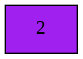

In [54]:
p = [2]
pancakes_network(p,len(p))

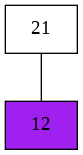

In [53]:
p = [2,1]
pancakes_network(p,len(p))

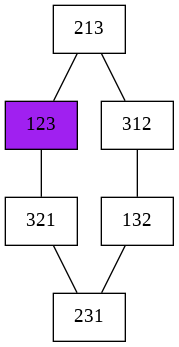

In [57]:
p = [2,1,3]
pancakes_network(p,len(p))

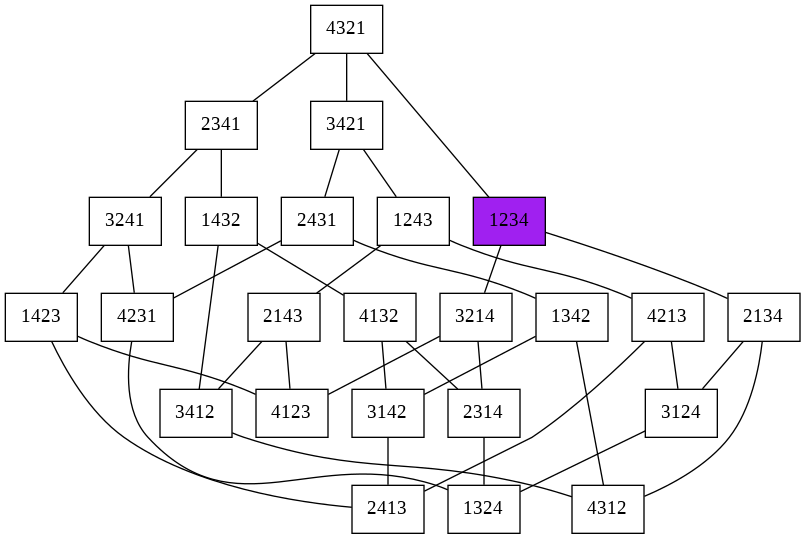

In [58]:
p = [4,3,2,1]
pancakes_network(p,len(p))

<br>
<hr>
<br>

## Grafíque el arbol de pancakes usando dos espatulas.

In [46]:
def ModifiedBFS(s):
        
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        queue = [] 
        queue.append(s) 
        visited[lstr(s)] = True
        while queue: 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s),shape='box')
            G.add_node(node)

            if (s != sorted(s)):
              for i in range(len(s)-1):
                for j in range(i+1):

                  d=s[0:j]+s[j:i+2][::-1]+s[i+2:]
                  if (d != s) and not(lstr(d) in visited.keys()):
                  
                    if (d != sorted(d)):
                      node = pydot.Node(lstr(d),shape='box')
                    else:
                      node = pydot.Node(lstr(d),style="filled",shape='box', fillcolor="yellow") # first sorted green
                    
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    graph[lstr(s)].append(lstr(d))
                    queue.append(d) 
                    visited[lstr(d)] = True 

        im = Image(G.create_png())
        display(im)

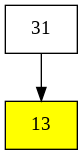

In [47]:
# n= 2
p = [3,1]
ModifiedBFS(p)

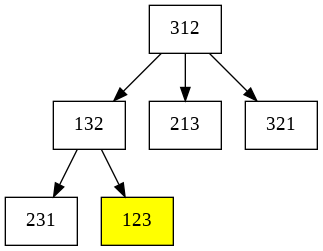

In [48]:
# n=3
p = [3,1,2]
ModifiedBFS(p)

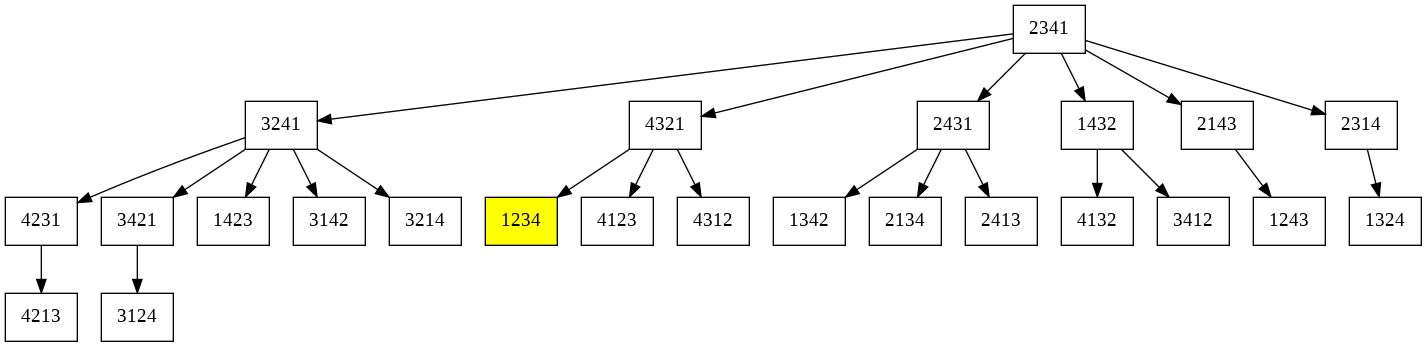

In [49]:
# n=4
p = [2,3,4,1]
ModifiedBFS(p)

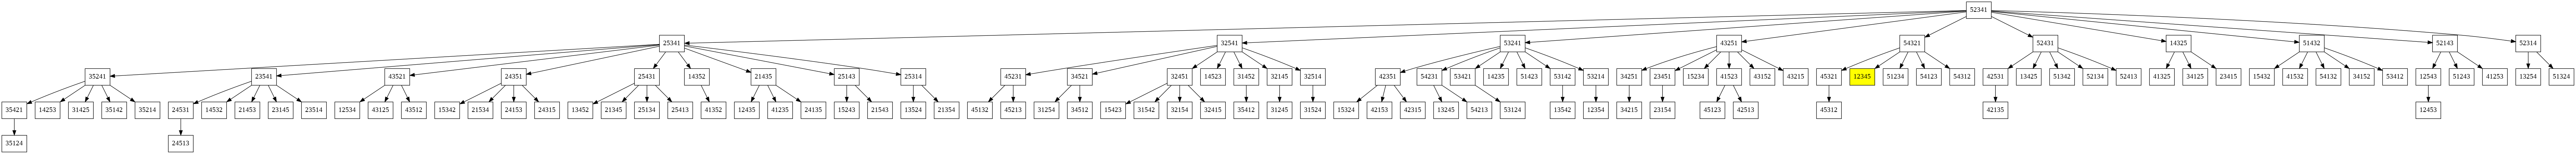

In [50]:
# n=5
p = [5,2,3,4,1]
ModifiedBFS(p)

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/


